In [1]:
import sys
import matplotlib.pyplot as plt
import pandas as pd

MPLSTYLE = '/arc/home/shiona/paper_sty.mplstyle'
plt.style.use(MPLSTYLE)

journal_textwidths = {'prd': 6.50127,
                      'none': 8.5,
                      'kaobook':6.5, # just a guess
                      'apj':6.0,
                      'aj': 6.0
                      } # Latex's \textwidth in inches

def figsize(fraction_of_textwidth = 0.45,height_per_width  = 1 / 1.61803399,journal = 'prd'):
    """When making your figure, decide its aspect ratio and your journal and its width as a fraction of the \textwidth of the journal. Then use matplotlib.pyplot.Figure(figsize = ...) to specify the right size"""
    textwidth = journal_textwidths[journal]
    width_in = textwidth * fraction_of_textwidth
    height_in = height_per_width * width_in
    return (width_in, height_in)

plt.rcParams["figure.figsize"] = figsize( 2 / 1.61803399,journal = 'apj')



In [49]:
import numpy as np
N=130
x_data=np.linspace(.5,5,N)
y_data=[np.random.normal(0,1/x) for x in x_data]
c_data=np.random.normal(0,5,N)
df=pd.DataFrame(x_data,columns=['snr'])
df['tau_offset']=y_data
df['cal_tar_sep']=c_data
df.to_csv('fake_hco_loc_data.csv',index=False)



In [48]:
import numpy as np
import pandas
df=pandas.read_csv('/arc/home/shiona/scripts/hco_comissioning2_M5_manual_fit_all_hco.csv')#/arc/home/shiona/scripts/hco_comissioning2_M5_fit_all_hco.csv')
dfx=df[df['pulsar_good_pos']==True]
dfx['offset_mas']=np.abs(dfx['tau_xx']*1e3*90)

dfx=dfx[dfx['incoh_snr_xx']>15]
dfx=dfx[np.abs(dfx['snr_xx'])>20].reset_index(drop=True)

dfx['snr']=dfx['snr_xx']
dfx['tau_offset']=dfx['tau_xx']*1e3
dfx['angular_offset']=dfx['tau_offset']*80
dfx['cal_tar_sep']=dfx['delta_y']
#dfx=dfx[np.abs(dfx['snr_xx'])>30].reset_index(drop=True)
#rms=(np.sqrt(np.sum((np.array(dfx['tau_xx']*1e3))**2)/len(dfx)))
#plt.axhline(rms,ls='--',lw=.5,color='black')
#plt.axhline(-rms,ls='--',lw=.5,color='black')
#plt.axhline(2*rms,ls='--',lw=.5,color='gray')
#plt.axhline(-2*rms,ls='--',lw=.5,color='gray')
#cbar.set_label('cal target sep [deg]')

Text(0.5, 0, 'angular offset [mas]')

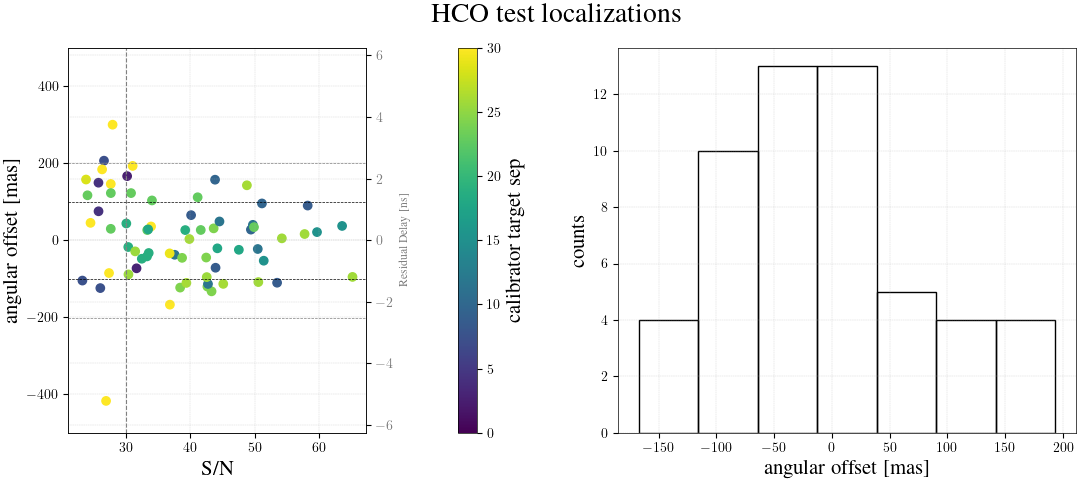

In [59]:
figure = plt.figure(figsize=(13, 5))
grid = plt.GridSpec(1, 2, figure=figure) #hspace=0.4, wspace=0.2,f
df=dfx
fs=20
fs2=15
figure.suptitle('HCO test localizations',y=0.97,fontsize=fs)

ax1 = plt.subplot(grid[0,0])

im=ax1.scatter(df['snr'],df['angular_offset']+50,c=np.abs(df['cal_tar_sep']),vmin=0,vmax=30)
cbar=plt.colorbar(im,pad=0.2)
cbar.set_label('calibrator target sep',fontsize=fs2)
ax1.set_ylim(-500,500)
ax1.axvline(30,ls='--',color='gray')
ax1a = ax1.twinx()
ax1a.scatter(df['snr'], df['tau_offset'], color="None",s=.0001)
ax1a.set_ylabel('Residual Delay [ns]', color='tab:gray')
ax1a.tick_params(axis='y', labelcolor='tab:gray')
ax1a.set_ylim(-500/80,500/80)



dfm=dfx[np.abs(dfx['snr_xx'])>30].reset_index(drop=True)
rms=(np.sqrt(np.sum((np.array(dfm['angular_offset']))**2)/len(dfm)))

ax1.axhline(rms,ls='--',lw=.5,color='black')
ax1.axhline(-rms,ls='--',lw=.5,color='black')

ax1.axhline(2*rms,ls='--',lw=.5,color='gray')
ax1.axhline(-2*rms,ls='--',lw=.5,color='gray')

ax2 = plt.subplot(grid[0,1])

ax1.set_xlabel('S/N',fontsize=fs2)
ax1.set_ylabel('angular offset [mas]',fontsize=fs2)

ax2.hist(dfm['angular_offset']+50,fill=False,edgecolor='black',bins='auto')

ax2.set_ylabel('counts',fontsize=fs2)
ax2.set_xlabel('angular offset [mas]',fontsize=fs2)




In [58]:
dfm=dfx[np.abs(dfx['snr_xx'])>30].reset_index(drop=True)

print(np.mean(np.array(dfm['angular_offset'])))
                    

-55.16415094106709


In [54]:
len(dfm)

19